# **Assingment PW Skills - EDA - Mrinal Sahay**

**EDA - 1**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/BIKE DETAILS.csv")

Q1. What is the range of selling prices in the dataset ?

In [3]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", price_range)

Range of selling prices: 755000


Q2. What is the median selling price for bikes in the dataset ?

In [4]:
median_price = df['selling_price'].median()
print("Median selling price:", median_price)

Median selling price: 45000.0


Q3. What is the most common seller type ?

In [5]:
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)

Most common seller type: Individual


Q4. How many bikes have driven more than 50,000 kilometers ?

In [14]:
high_km_count = df[df['km_driven'] > 50000].shape[0]
print("Bikes with >50,000 km:", high_km_count)

Bikes with >50,000 km: 170


Q5. What is the average km_driven value for each ownership type ?

In [11]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()
print(avg_km_by_owner)

       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


Q6. What proportion of bikes are from the year 2015 or older ?

In [15]:
proportion_old_bikes = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print("Proportion of bikes from 2015 or earlier:", proportion_old_bikes)

Proportion of bikes from 2015 or earlier: 0.5664467483506126


Q7. What is the trend of missing values across the dataset ?

Missing values trend:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


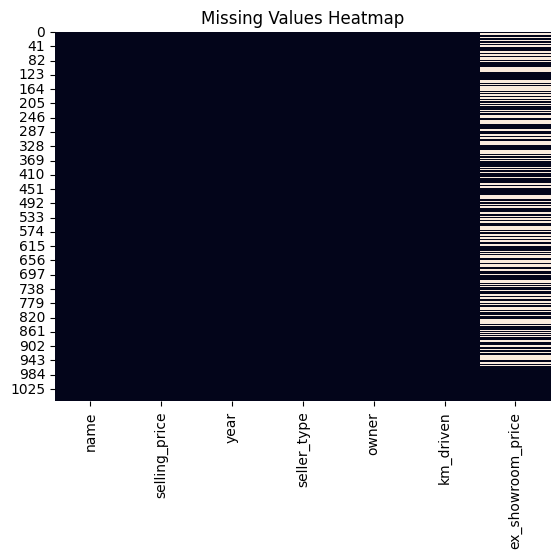

In [16]:
missing_values = df.isnull().sum()
print("Missing values trend:\n", missing_values)
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Q8. What is the highest ex_showroom_price recorded, and for which bike ?

In [17]:
max_price_idx = df['ex_showroom_price'].idxmax()
bike_name = df.loc[max_price_idx, 'name']
max_price = df.loc[max_price_idx, 'ex_showroom_price']
print(f"Bike with highest showroom price: {bike_name}, Price: {max_price}")

Bike with highest showroom price: Harley-Davidson Street Bob, Price: 1278000.0


Q9. What is the total number of bikes listed by each seller type ?

In [19]:
bike_count_by_seller = df['seller_type'].value_counts()\
                          .rename_axis('seller_type')\
                          .to_frame('count')
print(bike_count_by_seller)

             count
seller_type       
Individual    1055
Dealer           6


Q10. What is the relationship between selling_price and km_driven for first-owner bikes ?

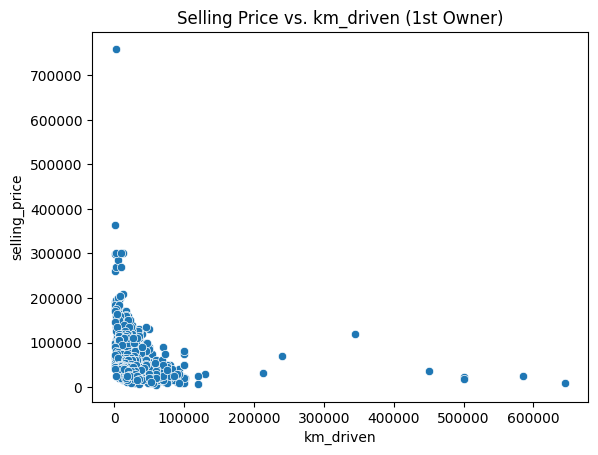

In [20]:
first_owner_df = df[df['owner'].str.contains('1st')]
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title("Selling Price vs. km_driven (1st Owner)")
plt.show()

Q11.  Identify and remove outliers in the km_driven column using the IQR method ?

In [21]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]
print("Data shape after outlier removal:", filtered_df.shape)

Data shape after outlier removal: (1022, 7)


Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price ?

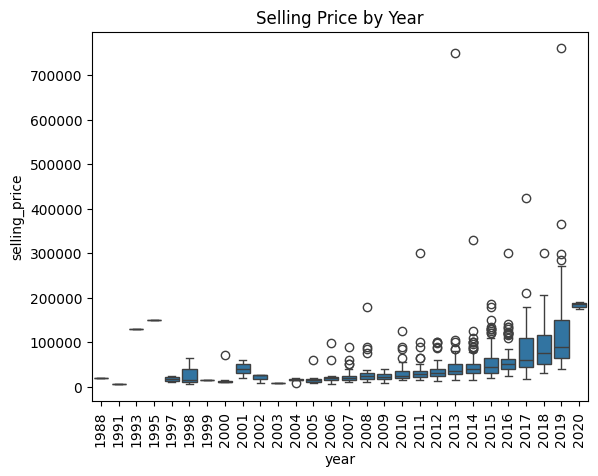

In [22]:
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title("Selling Price by Year")
plt.show()

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

In [24]:
avg_depreciation = df.groupby('age')['depreciation'].mean().reset_index()
print(avg_depreciation)

    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


Q14. Which bike names are priced significantly above the average price for their manufacturing year ?

In [25]:
yearly_avg = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(yearly_avg, on='year', suffixes=('', '_avg'))
overpriced_bikes = merged[merged['selling_price'] > merged['selling_price_avg']]
print(overpriced_bikes[['name', 'year', 'selling_price']])

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap ?

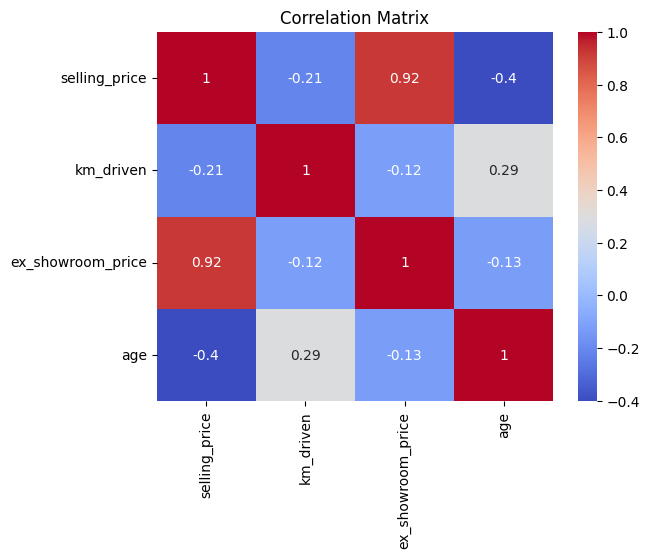

In [26]:
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'age']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**EDA - 2**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Car Sale.csv')

Q1.  What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

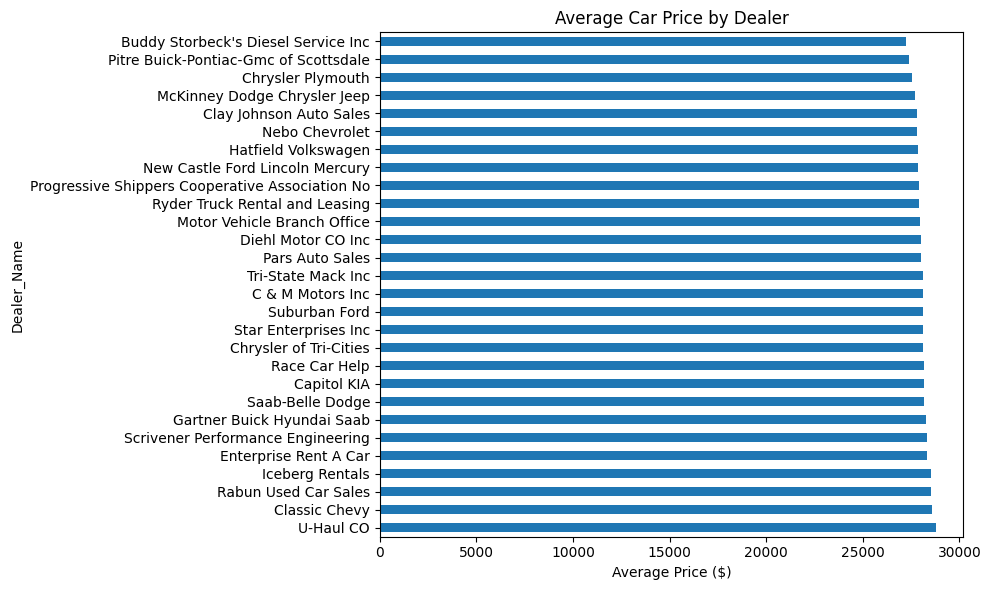

In [28]:
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_per_dealer)

# Optional: Visualize
avg_price_per_dealer.plot(kind='barh', figsize=(10, 6))
plt.xlabel("Average Price ($)")
plt.title("Average Car Price by Dealer")
plt.tight_layout()
plt.show()

Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ?

In [29]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation_by_brand)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ?

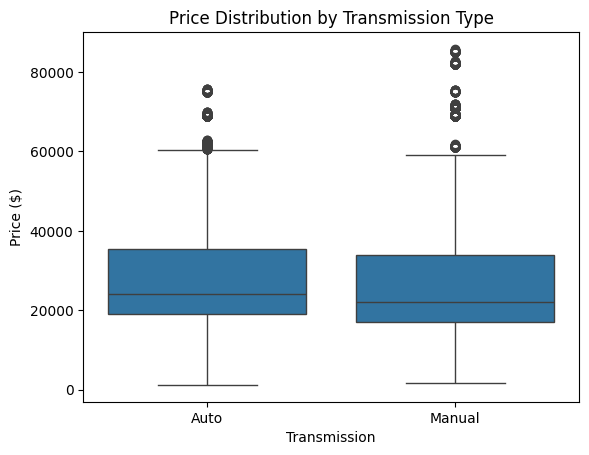

In [30]:
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Price Distribution by Transmission Type")
plt.show()

Q4. What is the distribution of car prices across different regions ?

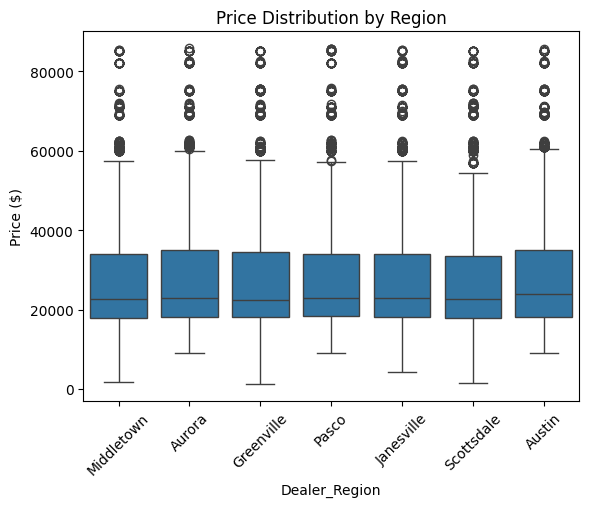

In [31]:
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()

Q5. What is the distribution of cars based on body styles ?

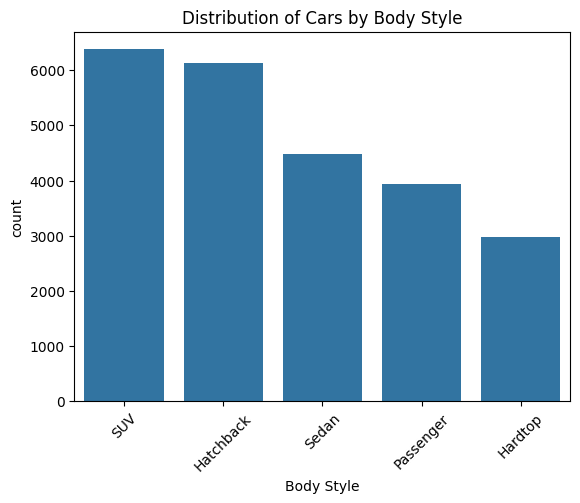

In [32]:
sns.countplot(data=df, x='Body Style', order=df['Body Style'].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()

Q6. How does the average selling price of cars vary by customer gender and annual income ?

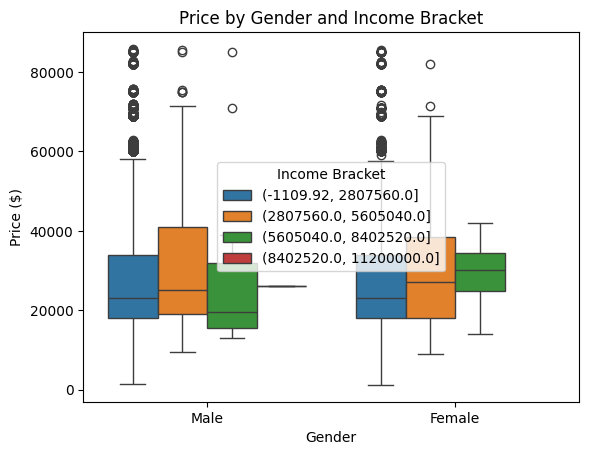

In [33]:
sns.boxplot(data=df, x='Gender', y='Price ($)', hue=pd.cut(df['Annual Income'], bins=4))
plt.title("Price by Gender and Income Bracket")
plt.legend(title='Income Bracket')
plt.show()

Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

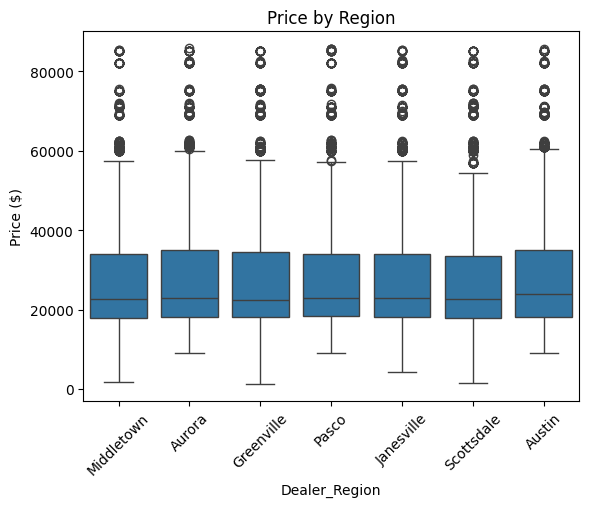

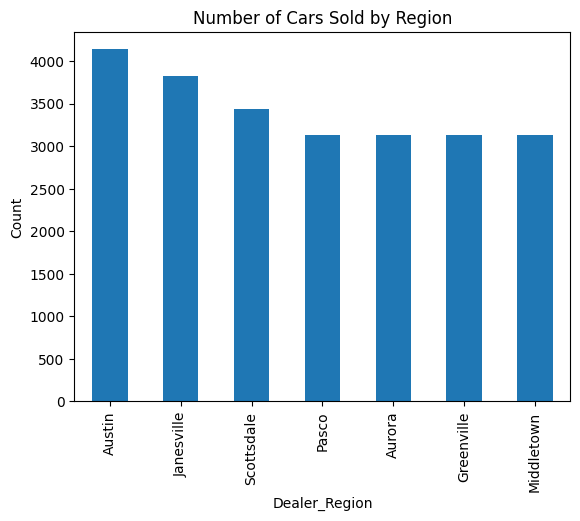

In [34]:
# Price distribution
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price by Region")
plt.xticks(rotation=45)
plt.show()

# Number sold
region_counts = df['Dealer_Region'].value_counts()
region_counts.plot(kind='bar', title="Number of Cars Sold by Region")
plt.ylabel("Count")
plt.show()

Q8. How does the average car price differ between cars with different engine sizes ?

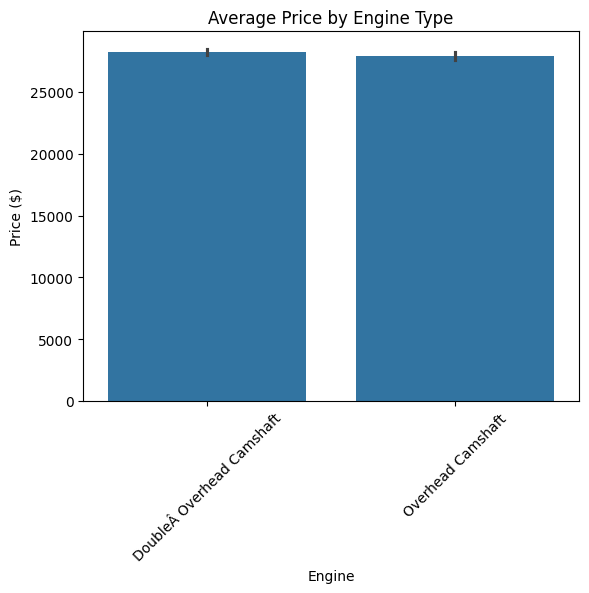

In [35]:
sns.barplot(data=df, x='Engine', y='Price ($)', estimator='mean')
plt.title("Average Price by Engine Type")
plt.xticks(rotation=45)
plt.show()

Q9. How do car prices vary based on the customer’s annual income bracket ?

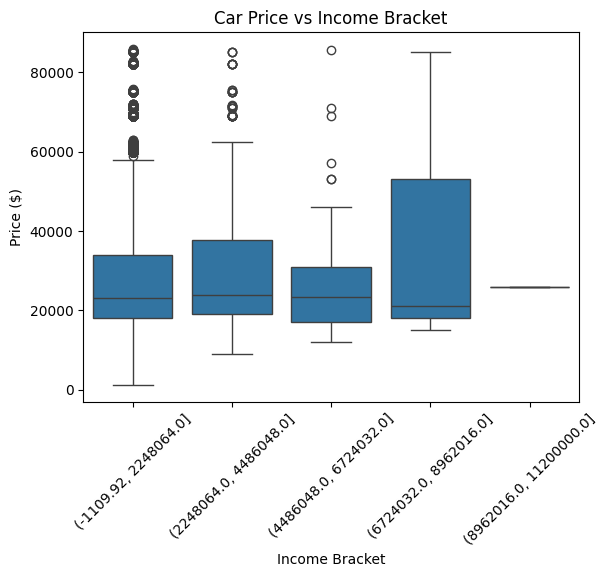

In [5]:
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=5)
sns.boxplot(data=df, x='Income Bracket', y='Price ($)')
plt.title("Car Price vs Income Bracket")
plt.xticks(rotation=45)
plt.show()

Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

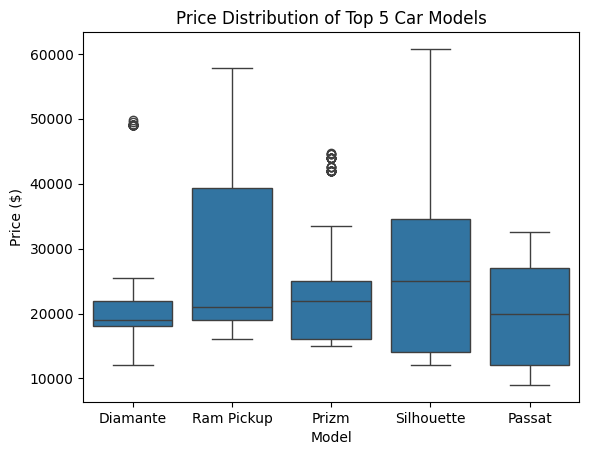

In [6]:
top_models = df['Model'].value_counts().head(5).index
top_model_data = df[df['Model'].isin(top_models)]

sns.boxplot(data=top_model_data, x='Model', y='Price ($)')
plt.title("Price Distribution of Top 5 Car Models")
plt.show()

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation ?

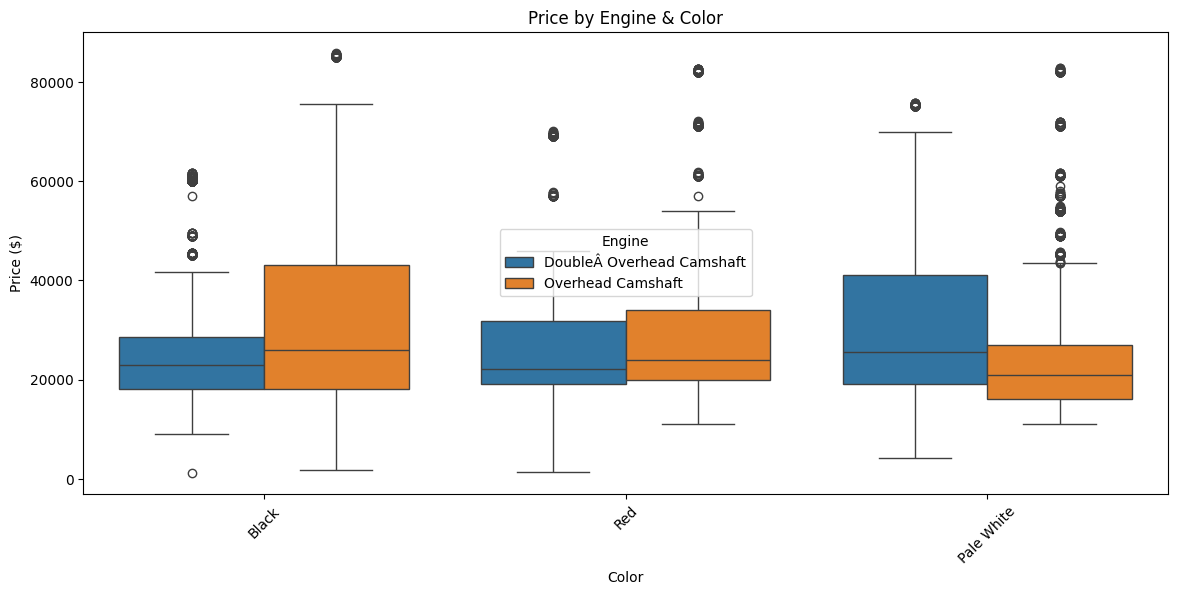

Color-wise price variation:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.title("Price by Engine & Color")
plt.xticks(rotation=45)
plt.show()

# To find color with highest variation:
color_std = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Color-wise price variation:\n", color_std)

Q12.  Is there any seasonal trend in car sales based on the date of sale ?

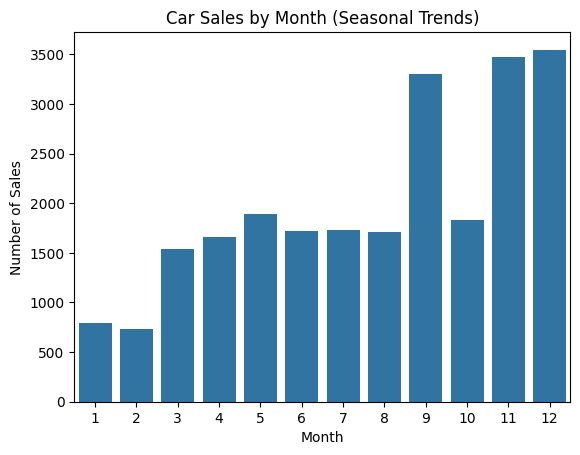

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sns.countplot(x='Month', data=df)
plt.title("Car Sales by Month (Seasonal Trends)")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

Q13. How does the car price distribution change when considering different combinations of body style and
transmission type ?

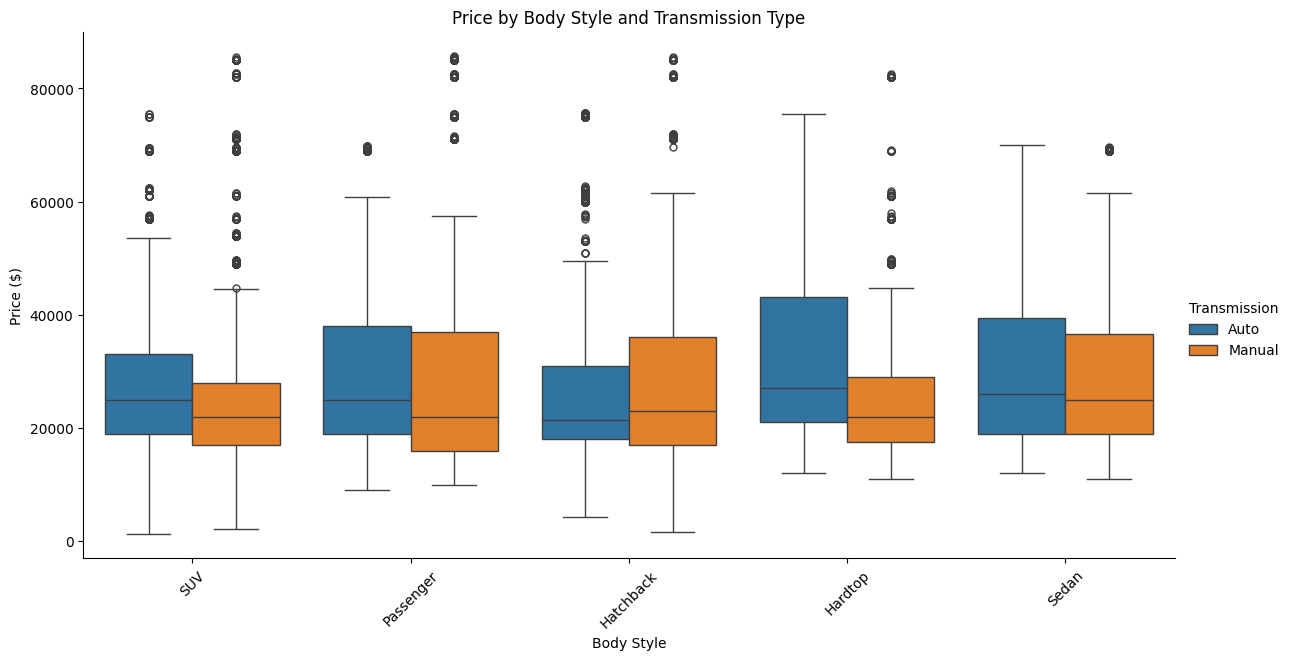

In [9]:
sns.catplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', kind='box', height=6, aspect=2)
plt.title("Price by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact ?

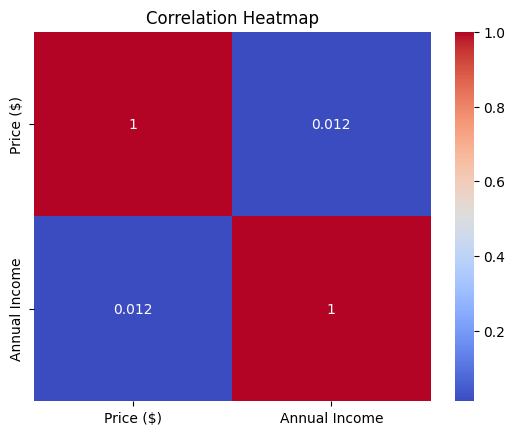

In [10]:
corr_data = df[['Price ($)', 'Annual Income']]
corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Q15. How does the average car price vary across different car models and engine types ?

In [11]:
avg_price_combo = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price_combo.sort_values(by='Price ($)', ascending=False).head(10))

           Model                     Engine     Price ($)
212           SC          Overhead Camshaft  61074.818182
198       Ranger  DoubleÂ Overhead Camshaft  61064.055556
222        Sable          Overhead Camshaft  61039.770833
56        Catera  DoubleÂ Overhead Camshaft  56836.933333
143        LX470          Overhead Camshaft  54037.490196
139        LS400          Overhead Camshaft  53157.941558
111        GS400          Overhead Camshaft  53086.000000
239       Tacoma  DoubleÂ Overhead Camshaft  53085.821918
25        Aurora          Overhead Camshaft  51833.556962
173  Park Avenue  DoubleÂ Overhead Camshaft  49387.750000


**EDA - 3**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Q1. What is the average rating for each product category ?

float64
1
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals

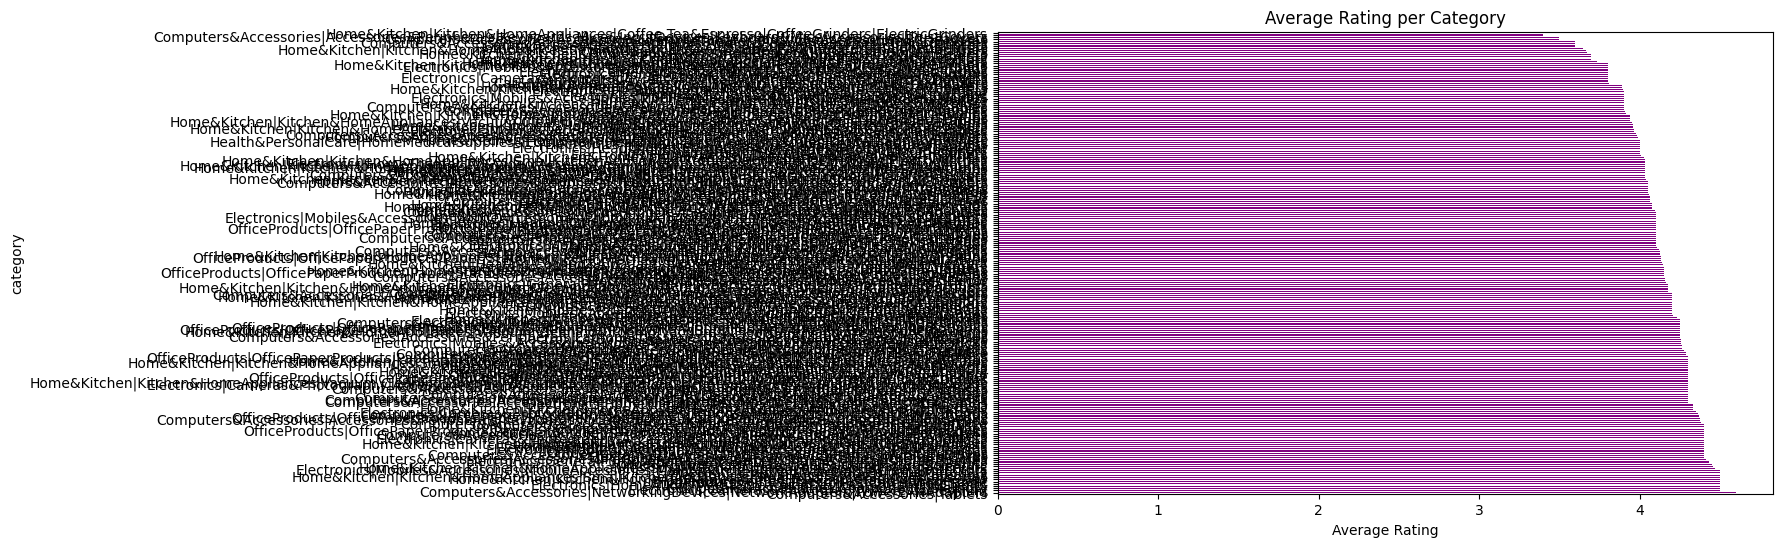

In [27]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

print(df['rating'].dtype)  # should say float64 now
print(df['rating'].isnull().sum())  # count of any values that became NaN

avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

avg_rating_by_category.plot(kind='barh', figsize=(10, 6), color='purple')
plt.title("Average Rating per Category")
plt.xlabel("Average Rating")
plt.show()

Q2. What are the top rating_count products by category ?

In [28]:
top_rated = df.sort_values(by='rating_count', ascending=False).groupby('category').head(1)
print(top_rated[['category', 'product_name', 'rating_count']])

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

Q3. What is the distribution of discounted prices vs. actual prices ?

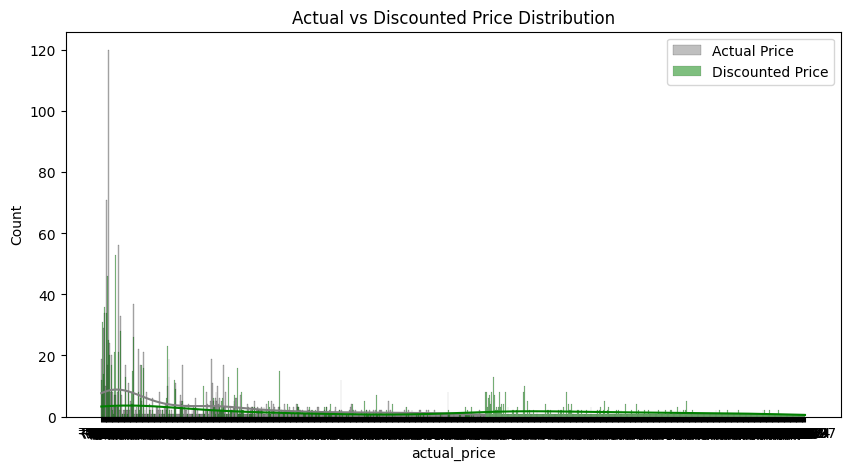

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], label='Actual Price', color='gray', kde=True)
sns.histplot(df['discounted_price'], label='Discounted Price', color='green', kde=True)
plt.legend()
plt.title("Actual vs Discounted Price Distribution")
plt.show()

Q4. How does the average discount percentage vary across categories ?

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

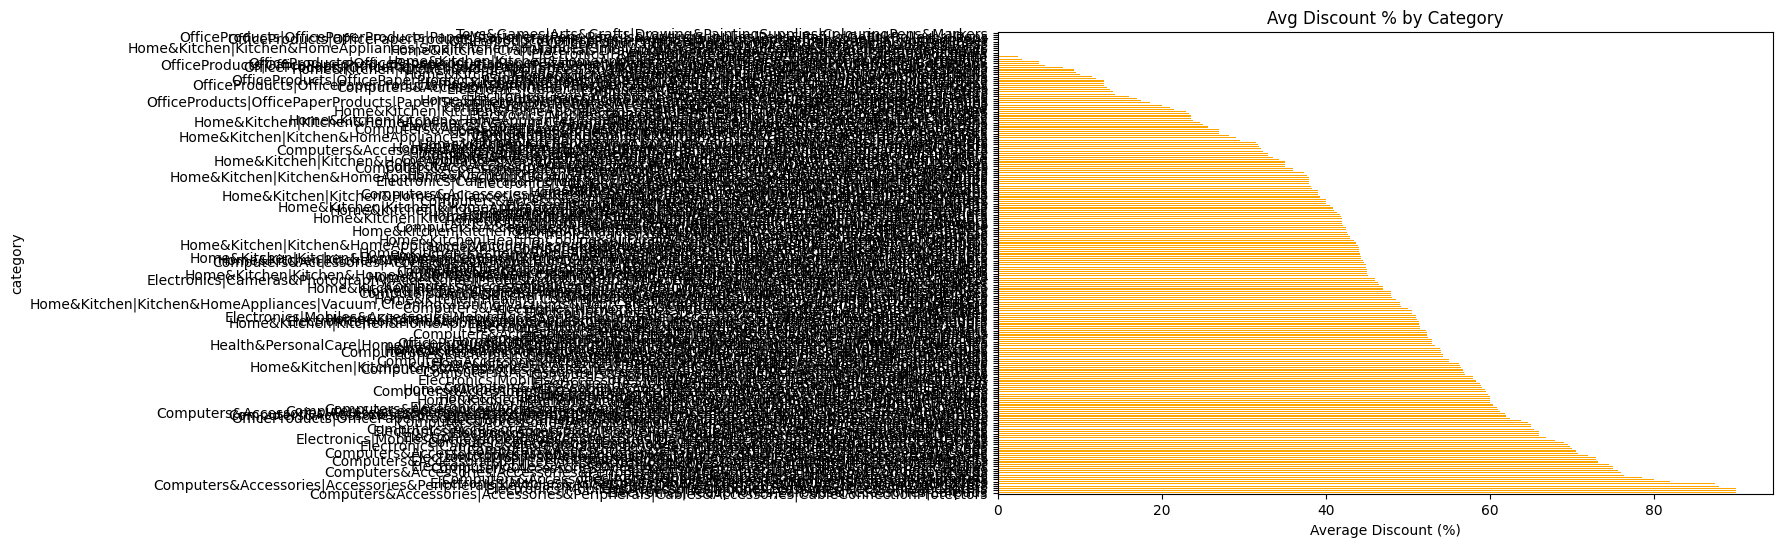

In [30]:
# Remove '%' and convert to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount)

avg_discount.plot(kind='barh', color='orange', figsize=(10, 6))
plt.title("Avg Discount % by Category")
plt.xlabel("Average Discount (%)")
plt.show()

Q5. What are the most popular product names ?

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

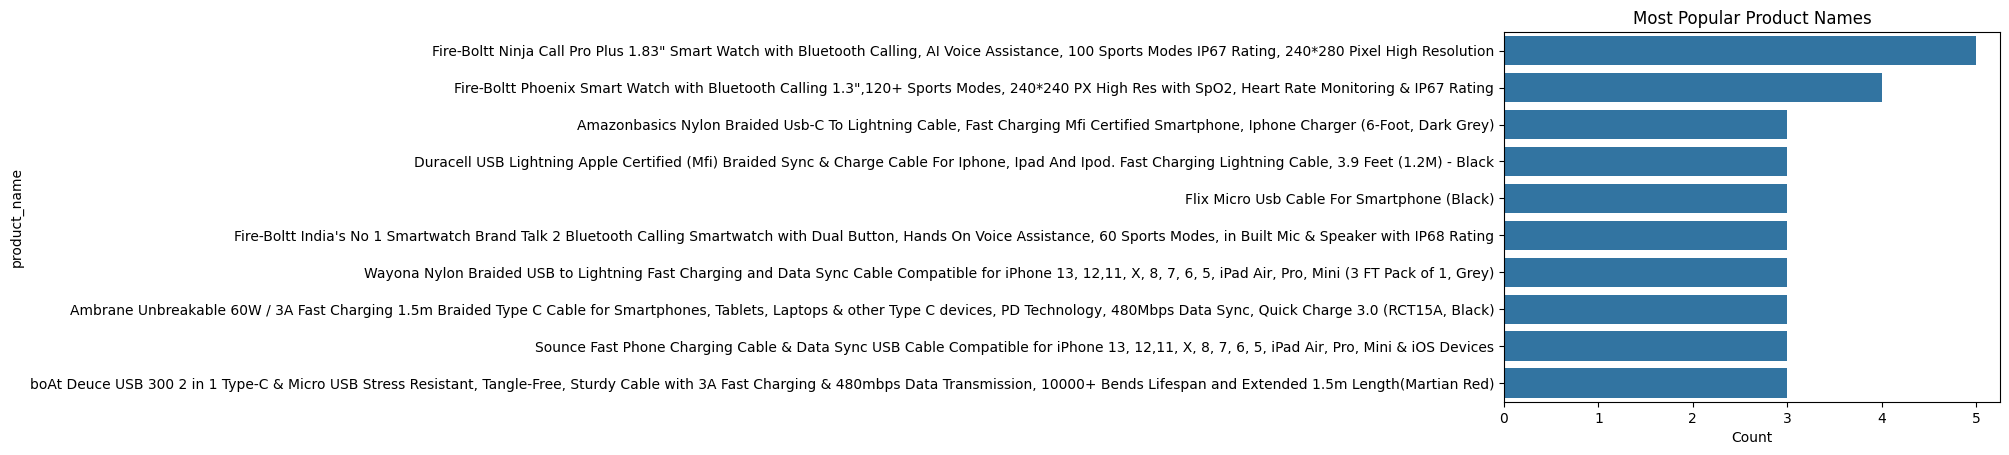

In [31]:
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)

sns.barplot(x=popular_products.values, y=popular_products.index)
plt.title("Most Popular Product Names")
plt.xlabel("Count")
plt.show()

Q6. What are the most popular product keywords ?

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['about_product'].fillna(''))
keywords = vectorizer.get_feature_names_out()
word_freq = X.toarray().sum(axis=0)

# Show top keywords
keyword_df = pd.DataFrame({'Keyword': keywords, 'Frequency': word_freq})
keyword_df.sort_values(by='Frequency', ascending=False, inplace=True)
print(keyword_df)

       Keyword  Frequency
16         usb       1230
1        cable        919
18    warranty        733
3     charging        662
15        type        633
8         easy        613
11        high        603
12       power        595
17         use        576
6      devices        574
5       design        543
4   compatible        488
19       water        457
14       speed        446
13     product        446
2       charge        433
0           10        431
9         fast        424
7      display        389
10        free        377


Q7.  What are the most popular product reviews ?

In [33]:
# Use review_count as popularity
popular_reviews = df.sort_values(by='rating_count', ascending=False).head(5)
print(popular_reviews[['review_title', 'review_content', 'rating_count']])

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   

                                         review_content rating_count  
1279  Does the job well,doesn't work on sand. though...          992  
750   Nive,very good batteries received,Like,Good pr...          989  
977   For those looking for a genuine review & a bri...       98,250  
1059  Bottle quality is not good.,Best for hot water...          976  
151   Not charging as fast as I'd have expected. May...          974  


Q8. What is the correlation between discounted_price and rating ?

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


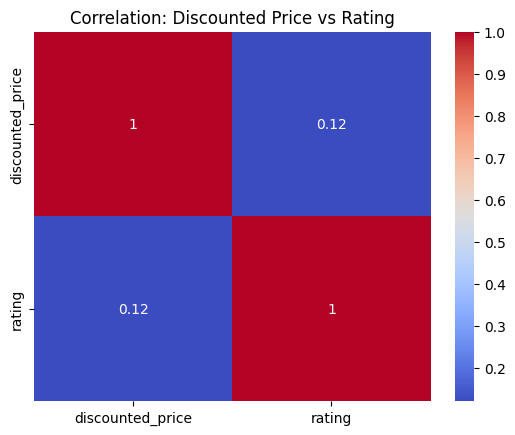

In [34]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation: Discounted Price vs Rating")
plt.show()

Q9.  What are the Top 5 categories based on the highest rating ?

In [35]:
top_rated_cats = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_rated_cats)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Q10. Identify any potential areas for improvement or optimization based on the data analysis ?

In [36]:
low_rating_high_discount = df[(df['rating'] < 3) & (df['discount_percentage'] > 50)]
print(low_rating_high_discount[['product_name', 'category', 'rating', 'discount_percentage']])

                                           product_name  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
1243  Personal Size Blender, Portable Blender, Batte...   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...   
1449  IONIX Tap filter Multilayer | Activated Carbon...   

                                               category  rating  \
545         Electronics|WearableTechnology|SmartWatches     2.8   
1243  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     2.3   
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     2.8   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...     2.9   

      discount_percentage  
545                  86.0  
1243                 55.0  
1286                 77.0  
1449                 72.0  


**EDA - 4**

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful ?

In [38]:
# Nulls
print("Missing values:\n", df.isnull().sum())

# Drop or fill missing values
df.dropna(inplace=True)

# Duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Missing values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?

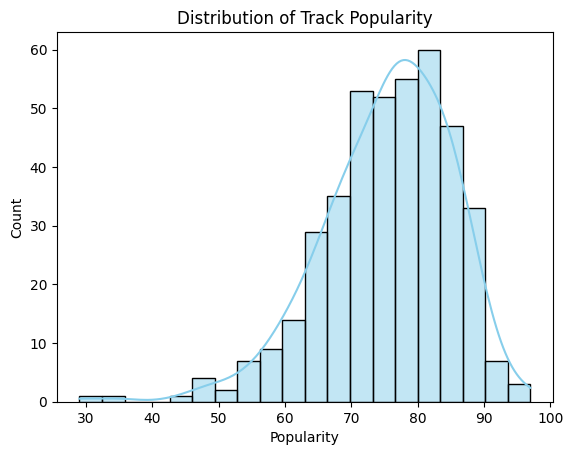

In [39]:
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Q3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?

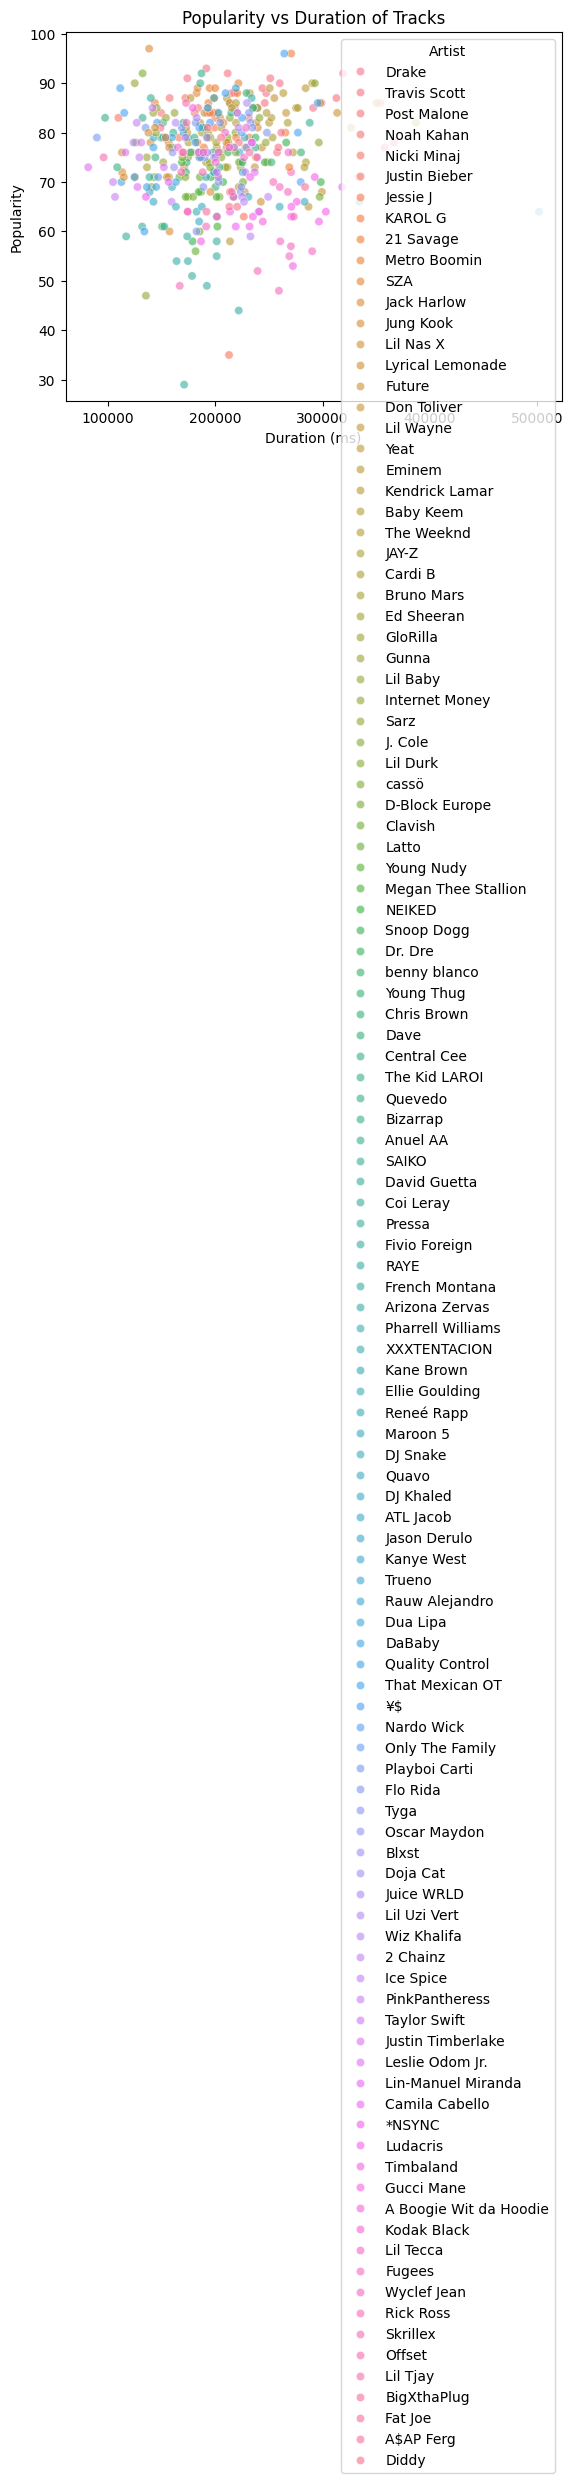

In [40]:
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Artist', alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.show()

Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot ?

<ipython-input-41-99531826c4f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='cool')


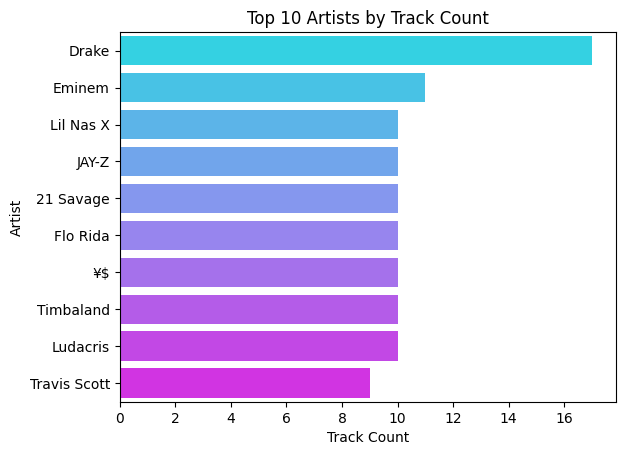

In [41]:
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, palette='cool')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.show()

Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?

In [42]:
least_popular_tracks = df.sort_values(by='Popularity').head(5)
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist ?

In [43]:
top_5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print(avg_popularity.sort_values(ascending=False))

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?

In [44]:
for artist in top_5_artists:
    top_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    print(f"{artist} - {top_track['Track Name'].values[0]} (Popularity: {top_track['Popularity'].values[0]})")

Drake - Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem - Without Me (Popularity: 90)
Lil Nas X - THATS WHAT I WANT (Popularity: 81)
JAY-Z - Ni**as In Paris (Popularity: 86)
21 Savage - redrum (Popularity: 96)


Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot ?

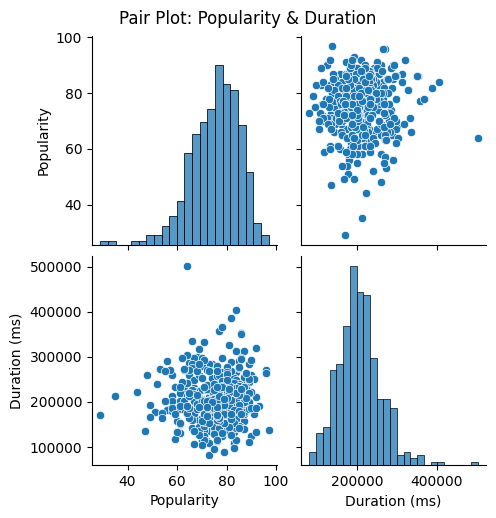

In [45]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot: Popularity & Duration", y=1.02)
plt.show()

Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot ?

<ipython-input-46-ed2299413d73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_artists_duration, x='Artist', y='Duration (ms)', palette='Set2')


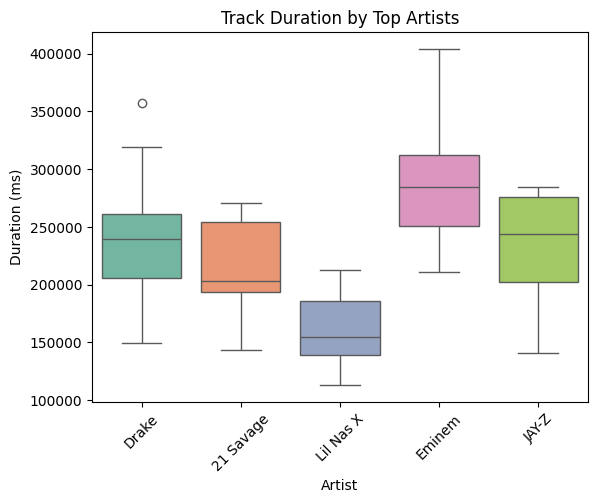

In [46]:
top_artists_duration = df[df['Artist'].isin(top_5_artists)]
sns.boxplot(data=top_artists_duration, x='Artist', y='Duration (ms)', palette='Set2')
plt.title("Track Duration by Top Artists")
plt.xticks(rotation=45)
plt.show()

Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot ?

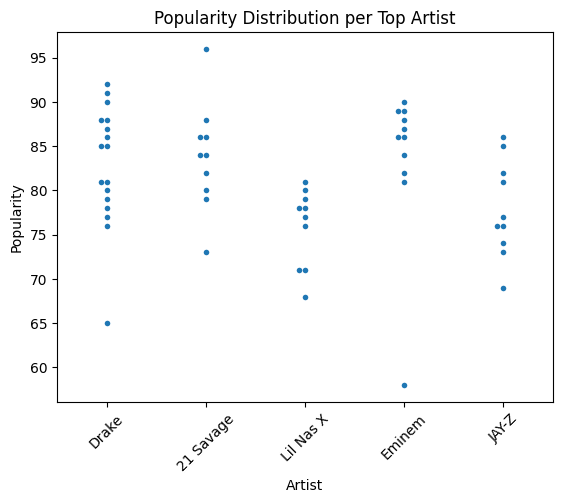

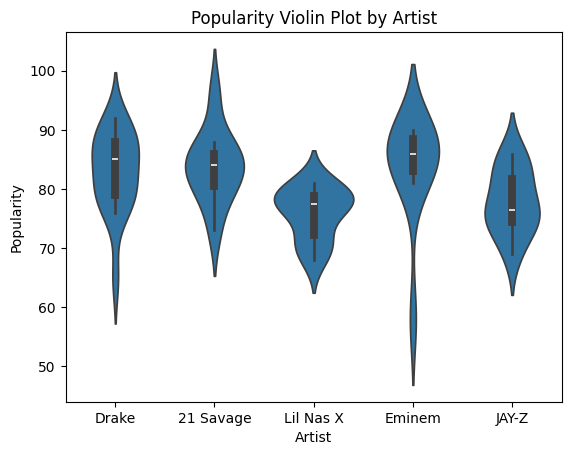

In [47]:
# Swarm Plot
sns.swarmplot(data=top_artists_duration, x='Artist', y='Popularity', size=4)
plt.title("Popularity Distribution per Top Artist")
plt.xticks(rotation=45)
plt.show()

# Alternative: Violin Plot
sns.violinplot(data=top_artists_duration, x='Artist', y='Popularity')
plt.title("Popularity Violin Plot by Artist")
plt.show()